In [1]:
'''
Q21. Write a Python program to train an SVM Classifier on the Iris dataset and
evaluate accuracy
'''
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [2]:
'''
Q22. Write a Python program to train two SVM classifiers with Linear and RBF
kernels on the Wine dataset, then compare their accuracies
'''
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

wine = datasets.load_wine()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf_linear = SVC(kernel='linear')
clf_linear.fit(X_train, y_train)
acc_linear = accuracy_score(y_test, clf_linear.predict(X_test))

clf_rbf = SVC(kernel='rbf')
clf_rbf.fit(X_train, y_train)
acc_rbf = accuracy_score(y_test, clf_rbf.predict(X_test))

print("Linear Kernel Accuracy:", acc_linear)
print("RBF Kernel Accuracy:", acc_rbf)


Linear Kernel Accuracy: 1.0
RBF Kernel Accuracy: 0.8055555555555556


In [3]:
'''
Q23. Write a Python program to train an SVM Regressor (SVR) on a housing dataset
and evaluate it using Mean Squared Error (MSE)
'''
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()
X, y = housing.data, housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Mean Squared Error: 1.3320115421348744


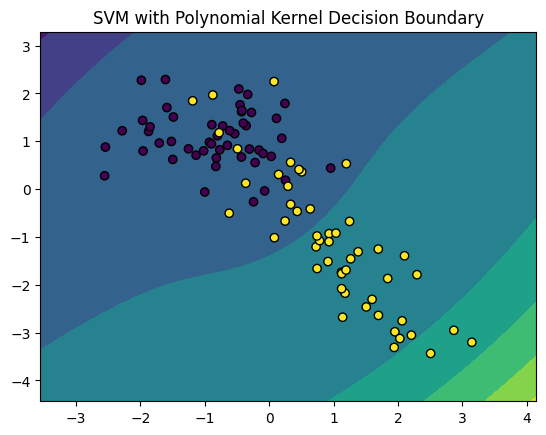

In [4]:
'''
Q24. Write a Python program to train an SVM Classifier with a Polynomial Kernel
and visualize the decision boundary
'''
from sklearn.datasets import make_classification
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1)
clf = SVC(kernel='poly', degree=3)
clf.fit(X, y)

disp = DecisionBoundaryDisplay.from_estimator(clf, X)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.title("SVM with Polynomial Kernel Decision Boundary")
plt.show()


In [5]:
'''
Q25. Write a Python program to train a Gaussian Naïve Bayes classifier on the
Breast Cancer dataset and evaluate accuracy
'''
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9736842105263158


In [6]:
'''
Q26. Write a Python program to train a Multinomial Naïve Bayes classifier for
text classification using the 20 Newsgroups dataset.
'''
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

newsgroups = fetch_20newsgroups(subset='all')
X = newsgroups.data
y = newsgroups.target

vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8503978779840848


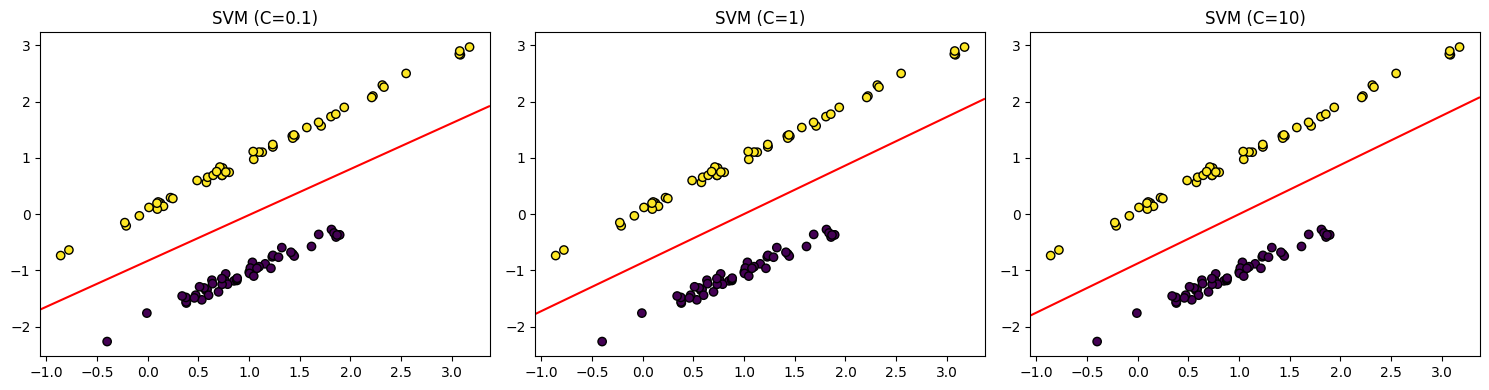

In [7]:
'''
Q27. Write a Python program to train an SVM Classifier with different C values
and compare the decision boundaries visually
'''
from sklearn.datasets import make_classification
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, random_state=42)
C_values = [0.1, 1, 10]
plt.figure(figsize=(15, 4))
for i, C in enumerate(C_values):
    clf = SVC(kernel='linear', C=C)
    clf.fit(X, y)
    plt.subplot(1, 3, i+1)
    plt.title(f"SVM (C={C})")
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='red', levels=[0], linestyles=['-'])
plt.tight_layout()
plt.show()


In [8]:
'''
Q28. Write a Python program to train a Bernoulli Naïve Bayes classifier for
binary classification on a dataset with binary features
'''
from sklearn.naive_bayes import BernoulliNB
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_features=10, n_informative=5, n_redundant=0,
                           n_classes=2, random_state=42)
X = (X > 0).astype(int)  # Binarize features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)
clf = BernoulliNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.85


In [9]:
'''
Q29. Write a Python program to apply feature scaling before training an SVM
model and compare results with unscaled data
'''
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Without scaling
clf_unscaled = SVC()
clf_unscaled.fit(X_train, y_train)
acc_unscaled = accuracy_score(y_test, clf_unscaled.predict(X_test))

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf_scaled = SVC()
clf_scaled.fit(X_train_scaled, y_train)
acc_scaled = accuracy_score(y_test, clf_scaled.predict(X_test_scaled))

print("Accuracy without scaling:", acc_unscaled)
print("Accuracy with scaling:", acc_scaled)


Accuracy without scaling: 0.8055555555555556
Accuracy with scaling: 1.0


In [10]:
'''
Q30. Write a Python program to train a Gaussian Naïve Bayes model and compare
the predictions before and after Laplace Smoothing
'''
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Default (no Laplace smoothing)
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy (no smoothing):", accuracy_score(y_test, y_pred))

# Laplace smoothing (var_smoothing parameter)
clf_smooth = GaussianNB(var_smoothing=1e-6)
clf_smooth.fit(X_train, y_train)
y_pred_smooth = clf_smooth.predict(X_test)
print("Accuracy (with smoothing):", accuracy_score(y_test, y_pred_smooth))


Accuracy (no smoothing): 0.89
Accuracy (with smoothing): 0.89


In [11]:
'''
Q31. Write a Python program to train an SVM Classifier and use GridSearchCV to
tune the hyperparameters (C,gamma, kernel)
'''
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1],
    'kernel': ['rbf', 'linear']
}
grid = GridSearchCV(SVC(), param_grid, cv=3)
grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)
print("Best Accuracy:", accuracy_score(y_test, grid.predict(X_test)))


Best Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Accuracy: 1.0


In [12]:
'''
Q32. Write a Python program to train an SVM Classifier on an imbalanced dataset
and apply class weighting and check it improve accuracy
'''
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1],
                           n_informative=3, n_features=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# Without class weighting
clf = SVC()
clf.fit(X_train, y_train)
print("Accuracy (no class weight):", accuracy_score(y_test, clf.predict(X_test)))

# With class weighting
clf_weighted = SVC(class_weight='balanced')
clf_weighted.fit(X_train, y_train)
print("Accuracy (with class weight):",
      accuracy_score(y_test, clf_weighted.predict(X_test)))


Accuracy (no class weight): 0.98
Accuracy (with class weight): 0.945


In [13]:
'''
Q33. Write a Python program to implement a Naïve Bayes classifier for spam detection
using email data
'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('SMSSpamCollection', sep='\t', header=None,
                 names=['label', 'text'])

# Encode labels: 'ham' -> 0, 'spam' -> 1
df['label_num'] = df.label.map({'ham': 0, 'spam': 1})

# Split data
X_train, X_test, y_train, y_test = train_test_split(df['text'],
                            df['label_num'], test_size=0.2, random_state=42)

# Vectorize text
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Naïve Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test_vec)
print("Spam Detection Accuracy:", accuracy_score(y_test, y_pred))


Spam Detection Accuracy: 0.9919282511210762


In [14]:
'''
Q34. Write a Python program to train an SVM Classifier and a Naïve Bayes
Classifier on the same dataset and compare their accuracy
'''
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf_svm = SVC()
clf_svm.fit(X_train, y_train)
acc_svm = accuracy_score(y_test, clf_svm.predict(X_test))

clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)
acc_nb = accuracy_score(y_test, clf_nb.predict(X_test))

print("SVM Accuracy:", acc_svm)
print("Naïve Bayes Accuracy:", acc_nb)


SVM Accuracy: 0.8055555555555556
Naïve Bayes Accuracy: 1.0


In [15]:
'''
Q35.  Write a Python program to perform feature selection before training a
Naïve Bayes classifier and compare results
'''
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Without feature selection
clf = GaussianNB()
clf.fit(X_train, y_train)
acc_full = accuracy_score(y_test, clf.predict(X_test))

# With feature selection
selector = SelectKBest(f_classif, k=5)
X_train_sel = selector.fit_transform(X_train, y_train)
X_test_sel = selector.transform(X_test)
clf_sel = GaussianNB()
clf_sel.fit(X_train_sel, y_train)
acc_sel = accuracy_score(y_test, clf_sel.predict(X_test_sel))

print("Accuracy without feature selection:", acc_full)
print("Accuracy with feature selection:", acc_sel)


Accuracy without feature selection: 1.0
Accuracy with feature selection: 0.9444444444444444


In [17]:
'''
Q36. Write a Python program to train an SVM Classifier using One-vs-Rest (OvR)
and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy
'''
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score

# Load Wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

# Train SVM with One-vs-Rest
ovr_clf = OneVsRestClassifier(SVC(kernel='linear'))
ovr_clf.fit(X_train, y_train)

# Train SVM with One-vs-One
ovo_clf = OneVsOneClassifier(SVC(kernel='linear'))
ovo_clf.fit(X_train, y_train)

# Predict and calculate accuracy
ovr_pred = ovr_clf.predict(X_test)
ovo_pred = ovo_clf.predict(X_test)

ovr_accuracy = accuracy_score(y_test, ovr_pred)
ovo_accuracy = accuracy_score(y_test, ovo_pred)

print('ovr_accuracy:',ovr_accuracy)
print('ovo_accuracy: ', ovo_accuracy)

ovr_accuracy: 0.9814814814814815
ovo_accuracy:  0.9814814814814815


In [18]:
'''
Q37. Write a Python program to train an SVM Classifier using Linear, Polynomial,
and RBF kernels on the Breast Cancer dataset and compare their accuracy
'''
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

# Train SVM with Linear kernel
linear_clf = SVC(kernel='linear')
linear_clf.fit(X_train, y_train)
linear_pred = linear_clf.predict(X_test)
linear_accuracy = accuracy_score(y_test, linear_pred)

# Train SVM with Polynomial kernel
poly_clf = SVC(kernel='poly', degree=3)
poly_clf.fit(X_train, y_train)
poly_pred = poly_clf.predict(X_test)
poly_accuracy = accuracy_score(y_test, poly_pred)

# Train SVM with RBF kernel
rbf_clf = SVC(kernel='rbf')
rbf_clf.fit(X_train, y_train)
rbf_pred = rbf_clf.predict(X_test)
rbf_accuracy = accuracy_score(y_test, rbf_pred)

linear_accuracy, poly_accuracy, rbf_accuracy

(0.9649122807017544, 0.9415204678362573, 0.935672514619883)

In [19]:
'''
Q38. Write a Python program to train an SVM Classifier using Stratified K-Fold
Cross-Validation and compute the average accuracy
'''
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score
import numpy as np

# Load Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = SVC(kernel='linear')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

average_accuracy = np.mean(accuracies)
print(average_accuracy)

0.9720634920634922


In [20]:
'''
Q39. Write a Python program to train a Naïve Bayes classifier using different
prior probabilities and compare performance
'''
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

# Train Naive Bayes with default priors
nb_default = GaussianNB()
nb_default.fit(X_train, y_train)

# Train Naive Bayes with custom priors
priors = [0.2, 0.5, 0.3]  # Example prior probabilities
nb_custom = GaussianNB(priors=priors)
nb_custom.fit(X_train, y_train)

# Predict and calculate accuracy
default_pred = nb_default.predict(X_test)
custom_pred = nb_custom.predict(X_test)

default_accuracy = accuracy_score(y_test, default_pred)
custom_accuracy = accuracy_score(y_test, custom_pred)

print('default_accuracy: ', default_accuracy)
print('custom_accuracy: ',custom_accuracy)

default_accuracy:  1.0
custom_accuracy:  1.0


In [21]:
'''
Q40. Write a Python program to perform Recursive Feature Elimination (RFE)
before training an SVM Classifier and compare accuracy
'''
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

# Train SVM without RFE
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Predict and calculate accuracy
pred = clf.predict(X_test)
accuracy_without_rfe = accuracy_score(y_test, pred)

# Perform RFE
rfe = RFE(estimator=SVC(kernel='linear'), n_features_to_select=5)
rfe.fit(X_train, y_train)

# Train SVM with selected features
clf_rfe = SVC(kernel='linear')
clf_rfe.fit(rfe.transform(X_train), y_train)

# Predict and calculate accuracy
pred_rfe = clf_rfe.predict(rfe.transform(X_test))
accuracy_with_rfe = accuracy_score(y_test, pred_rfe)

print('accuracy_without_rfe: ',accuracy_without_rfe)
print('accuracy_with_rfe: ',accuracy_with_rfe)

accuracy_without_rfe:  0.9814814814814815
accuracy_with_rfe:  0.9629629629629629


In [22]:
'''
Q41. Write a Python program to train an SVM Classifier and evaluate its
performance using Precision, Recall, and F1-Score instead of accuracy
'''
from sklearn.svm import SVC
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

# Load Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

# Train SVM
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Predict
pred = clf.predict(X_test)

# Calculate Precision, Recall, and F1-Score
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')
f1 = f1_score(y_test, pred, average='weighted')

print('precision: ',precision)
print('recall: ',recall)
print('f1:',f1)

precision:  0.982716049382716
recall:  0.9814814814814815
f1: 0.9815749306918357


In [23]:
'''
Q42. Write a Python program to train a Naïve Bayes Classifier and evaluate its
performance using Log Loss(Cross-Entropy Loss)
'''
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# Load Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

# Train Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict probabilities
probs = nb.predict_proba(X_test)

# Calculate Log Loss
logloss = log_loss(y_test, probs)

print('logloss: ',logloss)

logloss:  0.013696443178717162


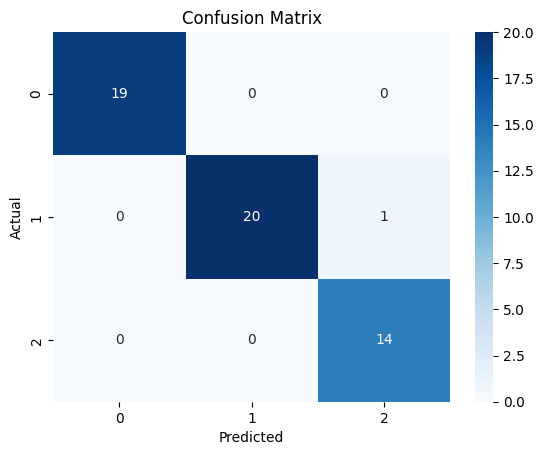

In [24]:
'''
Q43. Write a Python program to train an SVM Classifier and visualize the
Confusion Matrix using seaborn
'''
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Load Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Predict
pred = clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, pred)

# Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [25]:
'''
Q44. Write a Python program to train an SVM Regressor (SVR) and evaluate its
performance using Mean Absolute Error (MAE) instead of MSE
'''
from sklearn.svm import SVR
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Load california housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

# Train SVR
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Predict
pred = svr.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, pred)

print('Mean Absolute Error: ',mae)

Mean Absolute Error:  0.8664984635504496


In [26]:
'''
Q45. Write a Python program to train a Naïve Bayes classifier and evaluate its
performance using the ROC-AUC score
'''
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Load Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Binarize the output only for ROC-AUC computation
y_bin = label_binarize(y, classes=[0, 1, 2])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Naive Bayes on original (non-binarized) labels
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict probabilities
probs = nb.predict_proba(X_test)

# Binarize y_test for ROC-AUC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test_bin, probs, average='weighted', multi_class='ovr')

print('ROC-AUC Score:', roc_auc)


ROC-AUC Score: 1.0


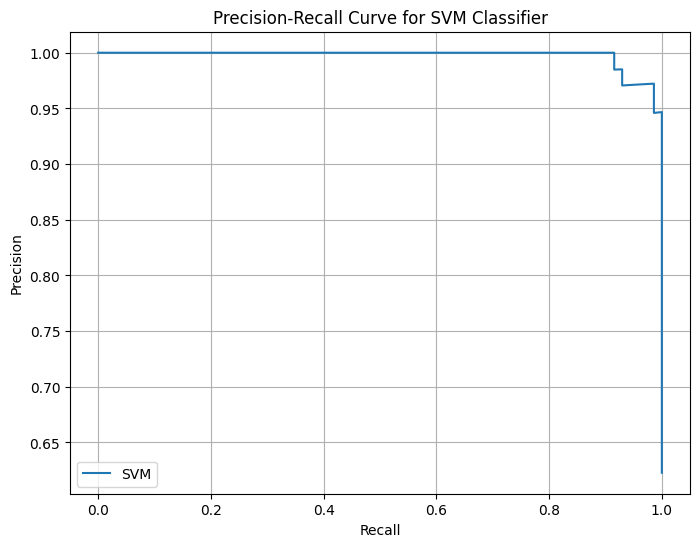

In [27]:
'''
Q46. Write a Python program to train an SVM Classifier and visualize the
Precision-Recall Curve.
'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train SVM classifier (with probability=True for predict_proba)
clf = SVC(kernel='linear', probability=True, random_state=42)
clf.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_scores = clf.predict_proba(X_test)[:, 1]

# Compute precision-recall pairs for different probability thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='SVM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVM Classifier')
plt.legend()
plt.grid(True)
plt.show()
